In [342]:
import os

import sys
import cv2
sys.path.append('/home/advice/Python/SR/Project/OCR/DataAugmentationForObjectDetection/data_aug/')
from bbox_util import *
sys.path.append('/home/advice/Python/SR/Project/OCR/DataAugmentationForObjectDetection/')
from data_aug.data_aug2 import *
sys.version , cv2.__version__

('3.6.7 | packaged by conda-forge | (default, Feb 28 2019, 09:07:38) \n[GCC 7.3.0]',
 '4.1.0')

In [343]:
ls

0.xml                                img/
8.jpg                                labeling and rotate.ipynb
DataAugmentationForObjectDetection/  newdata_append/
NaverAPI.ipynb                       ocrpretrain/
OCR 사용법                           pretrained_model/
clovar_test.jpg                      results/
data provider 파헤치기.ipynb         sample.p
diagnosis.xml                        tar/
gt/                                  tensorflow_PSENet/
hahaha.py


In [84]:
import cv2
import os
!python hahaha.py -dir=./

'NoneType' object has no attribute 'shape'
'NoneType' object has no attribute 'shape'
.//results/17.txt
17 : Done
'NoneType' object has no attribute 'shape'
'NoneType' object has no attribute 'shape'
.//results/30.txt
30 : Done
.//results/0.txt
0 : Done
'NoneType' object has no attribute 'shape'
.//results/32.txt
32 : Done
.//results/4.txt
4 : Done
.//results/9.txt
9 : Done
.//results/26.txt
26 : Done
.//results/79.txt
79 : Done
.//results/44.txt
44 : Done
'NoneType' object has no attribute 'shape'
.//results/1.txt
1 : Done
'NoneType' object has no attribute 'shape'
'NoneType' object has no attribute 'shape'
.//results/22.txt
22 : Done
'NoneType' object has no attribute 'shape'
'NoneType' object has no attribute 'shape'
'NoneType' object has no attribute 'shape'
too many indices for array
'NoneType' object has no attribute 'shape'
'NoneType' object has no attribute 'shape'
'NoneType' object has no attribute 'shape'
.//results/40.txt
40 : Done
.//results/25.txt
25 : Done
'NoneType' obje

In [1]:
import cv2
import os , re

In [2]:
import os ,re
img_list = os.listdir("img/")
img_list.sort()

In [9]:
checkimg = [i for i in img_list if re.search("^6.j" , i) is not None ]

In [10]:
dat = [re.split(".jpg|.png.|jpeg",img_list[0])[0]]
dat

['0']

In [70]:
dd = re.split(".jpg|.png.|jpeg",checkimg[0])[0]
print(dd)

6


In [71]:
import cv2
import matplotlib.pyplot as plt

In [74]:
def resizeShape(img, img_gt) : 
    ### 이미지 조정? 
    ### 크든 작든 한개로 고정해주기
    if img.shape[0] > img.shape[1] : 
        offset = (img.shape[1] * img_gt.shape[0] // img.shape[0] )
        ## 0 보다 작은 경우 이상하게 되서 수정했지만, 여진히 불안전 6.jpg!
        ## 가로 높이가 비슷하니까 발생하는 문제인듯?
        print(img_gt.shape[1] , img.shape[1] * img_gt.shape[0] // img.shape[0]  )
        if (img_gt.shape[1] - offset) // 2 < 0 :
            first = 0
        else :
            print("음수 발생")
            first = (img_gt.shape[1] - offset) // 2 

        ## 절대값으로 바꿔주고 해보기 
        #first = abs(first)
        img_gt = img_gt[:, first : (img_gt.shape[1] + offset) // 2 ]
        #img_gt = img_gt[:, (img_gt.shape[1] - offset) // 2:(img_gt.shape[1] + offset) // 2 ]
    else : 
        offset = (img.shape[0] * img_gt.shape[1] // img.shape[1] )
        img_gt = img_gt[(img_gt.shape[0] - offset) // 2:(img_gt.shape[0] + offset) // 2 ,:]
    img_gt = cv2.resize(img_gt, (img.shape[1],img.shape[0]))
    return img_gt

In [80]:
h , w = 1339, 1200
gt_h , gt_w = 752, 625

In [82]:
w * gt_h // h

673

6.jpg
수정전
(1339, 1200, 3)


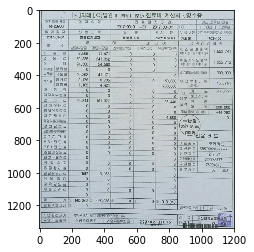

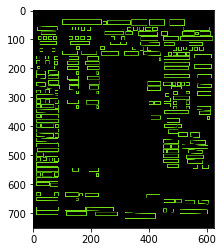

(1339, 1200, 3)
(752, 625, 3)
수정후
625 673


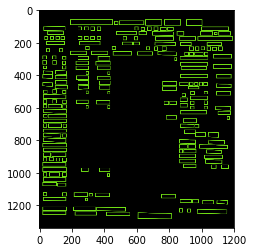

In [79]:
ck = checkimg[0]
#ck = img_list[1]
#ck = img_list[0]
print(ck)
image = cv2.imread("./img/" + ck )
dd = re.split(".jpg|.png.|jpeg",ck )[0]
gt = cv2.imread("./gt/"+dd + ".png")
print("수정전")
print(image.shape)
plt.imshow(image)
plt.show()
plt.imshow(gt)
plt.show()
print(image.shape)
print(gt.shape)
print("수정후")
gt = resizeShape(image, gt)
plt.imshow(gt)

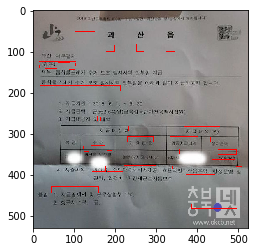

In [40]:
import numpy as np , pandas as pd
from scipy.spatial.distance import cdist

def findPoints(img, img_gt ) : 
    # green color 로 일단 색깔 입히기?
    lower = (0, 100, 0)
    upper = (255, 255, 255)
    h , w = img_gt.shape[0] , img_gt.shape[1]
    img_mask = cv2.inRange(img_gt, lower, upper )
    i = img.copy()
    cnts , _  = cv2.findContours(img_mask,  cv2.RETR_CCOMP ,cv2.CHAIN_APPROX_SIMPLE ) # cv2.RETR_EXTERNAL
    point3 = []
    point2 = []
    point = []
    for c in cnts : 
        rect = cv2.minAreaRect(c)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        check = np.array(box)[[0 , 2]]
        check = np.array([
            [check[0,0]/w , check[0,1]/h],
            [check[1,0]/w , check[1,1]/h]
        ])
        distance= np.linalg.norm(check[0,:] - check[1,:])
        if distance > 0.4 :
            continue
        dd = ",".join(list(map(lambda x : str(x), box.flatten().tolist())))+",###"
        x = box[:,0]
        y = box[:,1]
        xx , yy = np.mean(x) , np.mean(y)
        point2.append([xx,yy])
        point3.append(dd)
        point.append(box)
    #slice_ = pd.DataFrame(point2).drop_duplicates(keep= "first").index.values.tolist()
    pointt = np.array(point2)
    pointt[:,0] = pointt[:,0]/w
    pointt[:,1] = pointt[:,1]/h
    total = pd.DataFrame(pointt)
    metric = "euclidean"
    dist_ex1 = cdist( total , total, metric=metric )
    slice_ = pd.DataFrame(dist_ex1 < 0.01).drop_duplicates().index.tolist()
    box2 = np.array(point)[slice_]
    point = np.array(point3)[slice_]
    for box in box2 :
        im = cv2.drawContours(i,[box],0,(255,0,0),1)
    return point, im
point, im = findPoints(image, gt)
plt.imshow(im)
plt.show()

In [24]:
img_gt = cv2.imread("gt/" + gt_list[1])

In [25]:
img_gt.shape

(752, 625, 3)

In [73]:
import cv2
img_gt = cv2.imread("gt/" + gt_list[1])
img = cv2.imread("img/" + img_list[0])

In [74]:
np.unique(img_gt[:,:,0])

array([  0,   5,   9,  14,  17,  18,  21,  25,  28,  31,  34,  36,  37,
        38,  40,  42,  43,  44,  45,  46,  47,  48,  50,  51,  52,  53,
        54,  55,  56,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114], dtype=uint8)

In [47]:
import numpy as np
import matplotlib.pyplot as plt
img_list = os.listdir("img/")
img_list.sort()
gt_list = os.listdir("gt/")
gt_list.sort()
print(img_list ,  "\n" , gt_list)

['0.jpg', '1.jpg', '10.jpg', '100.png', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '2.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '3.jpg', '30.jpg', '31.jpg', '32.jpg', '33.jpg', '34.jpg', '35.jpg', '36.jpg', '37.jpg', '38.jpg', '39.jpg', '4.jpg', '40.jpg', '41.jpg', '42.jpg', '43.jpg', '44.jpg', '45.jpg', '46.jpg', '47.jpg', '48.jpg', '49.jpg', '5.jpg', '50.jpg', '51.jpg', '52.jpg', '53.jpg', '54.jpg', '55.jpg', '56.jpg', '57.jpg', '58.jpg', '59.jpg', '6.jpg', '60.jpg', '61.jpg', '62.jpg', '63.jpg', '64.jpg', '65.jpg', '66.jpg', '67.jpg', '68.jpg', '69.jpg', '7.jpg', '70.jpg', '71.jpg', '72.jpg', '73.jpg', '74.jpg', '75.jpg', '76.jpg', '77.jpg', '78.jpg', '79.jpg', '8.jpg', '9.jpg'] 
 ['0.png', '1.png', '10.png', '100.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.png', '18.png', '19.png', '2.png', '20.png', '21.png', '22.png', '23.png', '24.png', '25.png

530 525
[0.73333333 0.88867925] [0.9447619  0.90943396]
[0.7352381  0.89056604] [0.94285714 0.90754717]
[0.08380952 0.80943396] [0.30285714 0.83773585]
[0.08761905 0.81132075] [0.30285714 0.83584906]
[0.01333333 0.7754717 ] [0.46285714 0.80566038]
0.45053636000146846
[0.0152381  0.77735849] [0.46285714 0.80377358]
0.44839777987893115
[0.70666667 0.75283019] [0.84190476 0.88113208]
[0.70857143 0.75471698] [0.84       0.87924528]
[0.27238095 0.71509434] [0.3352381  0.73962264]
[0.27428571 0.71698113] [0.33333333 0.73773585]
[0.93904762 0.69056604] [0.96761905 0.71698113]
[0.94095238 0.69056604] [0.96571429 0.71509434]
[0.82857143 0.68490566] [0.93333333 0.71509434]
[0.83047619 0.68867925] [0.93142857 0.71509434]
[0.1047619  0.67169811] [0.82095238 0.74716981]
0.7201560771124773
[0.34285714 0.71132075] [0.64380952 0.74339623]
[0.10666667 0.67358491] [0.81904762 0.71698113]
0.7137015158890044
[0.8552381  0.63962264] [0.94095238 0.66226415]
[0.85714286 0.63773585] [0.93904762 0.65849057]
[0

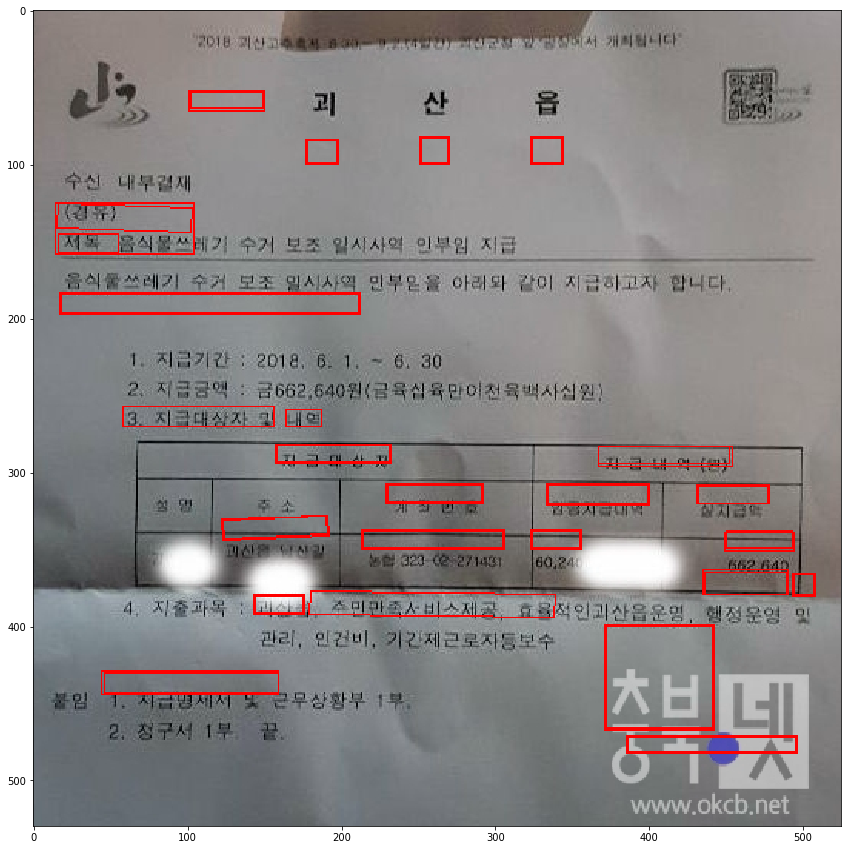

In [61]:
img = cv2.imread("img/" + img_list[1])
img_gt = cv2.imread("gt/" + gt_list[1]) # , cv2.IMREAD_COLOR
img_gt = resizeShape(img, img_gt)
#img = cv2.resize(img, (512 , 512))
#img_gt = cv2.resize(img_gt, (512 , 512))
h , w = img_gt.shape[0] , img_gt.shape[1]
print(h,w)
i = img.copy()
lower = (0, 100, 0)
upper = (255, 255, 255)
img_mask = cv2.inRange(img_gt, lower, upper )
i = img.copy()
cnts , _   = cv2.findContours(img_mask, cv2.RETR_CCOMP ,  cv2.CHAIN_APPROX_SIMPLE )
point2 = []
point = []
for c in cnts : 
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    #point2.append([ np.mean(box)])
    box = np.int0(box)
    #dd = ",".join(list(map(lambda x : str(x),box.flatten().tolist())))+",###"
    check = np.array(box)[[0 , 2]]
    check = np.array([
        [check[0,0]/w , check[0,1]/h],
        [check[1,0]/w , check[1,1]/h]]
    )
#     check[:,1] = check[0,1]/h , check[1,1]/h
#     print(check)
#     check[:,0] = check[0,0]/w , check[1,0]/w
#     print(check)
    endpoint = np.array([max(check[:,0]) , max(check[:,1])])
    startpoint = np.array([min(check[:,0]) , min(check[:,1])])
    print(startpoint , endpoint)
    distance= np.linalg.norm(startpoint- endpoint )
    if distance > 0.4 :
        print(distance)
        continue
    x = np.unique(box[:,0])
    y = np.unique(box[:,1])
    xx , yy = np.mean(x) , np.mean(y)
    point2.append([xx , yy ])
    point.append(box)
    im = cv2.drawContours(i,[box],0,(255,0,0),1)

f , ax = plt.subplots(figsize=(15,15))
plt.imshow(im)
plt.show()

In [333]:
h , w = img_gt.shape[1] , img_gt.shape[2]

In [326]:
# from scipy.spatial.distance import cdist
# total = pd.DataFrame(point2)
# metric = "euclidean"
# dist_ex1 = cdist( total , total, metric=metric )
# pd.DataFrame(dist_ex1 < 10).drop_duplicates().index.tolist()

In [334]:
print(np.max(dist_ex1[0,1:]))
print(dist_ex1.shape)

0.9305568225530346
(89, 89)


In [335]:
#np.sum(dist_ex1 < 10  , axis = 1)
#np.array(point)[:,[0,2],:].reshape(-1,4)
#pd.DataFrame(np.array(point)[:,[0,2],:].reshape(-1,4) ,columns=list("abcd")).head()

In [336]:
from sklearn.preprocessing import minmax_scale
print(point2)
minmax_scale(point2)

[[102.5, 433.5], [102.5, 433.5], [248.0, 432.5], [247.5, 432.5], [166.0, 432.5], [166.0, 432.5], [293.0, 430.5], [293.0, 430.5], [103.5, 418.5], [103.5, 418.5], [123.0, 407.5], [123.0, 407.5], [88.0, 407.5], [88.0, 407.5], [435.5, 389.0], [435.5, 389.0], [105.5, 392.0], [105.5, 396.5], [105.5, 387.5], [208.5, 401.5], [164.5, 420.0], [165.0, 416.0], [209.0, 411.5], [209.0, 393.0], [110.5, 350.5], [110.5, 350.5], [461.0, 349.5], [461.0, 349.5], [415.0, 349.5], [415.0, 349.5], [76.5, 343.5], [76.5, 343.5], [109.5, 336.5], [109.5, 336.5], [330.0, 335.5], [330.0, 335.5], [185.0, 335.5], [185.0, 335.5], [451.5, 334.5], [451.5, 334.0], [415.0, 334.5], [415.0, 334.0], [89.0, 324.0], [89.0, 324.0], [100.0, 310.5], [100.0, 311.0], [100.0, 267.0], [100.0, 267.0], [80.0, 267.0], [80.0, 267.0], [182.0, 235.5], [182.5, 235.5], [81.5, 220.5], [81.5, 220.5], [91.5, 202.5], [90.5, 203.0], [427.0, 166.0], [405.5, 177.0], [432.0, 166.0], [414.0, 155.0], [339.0, 154.5], [339.5, 154.0], [231.5, 154.5], [23

array([[0.08894536, 1.        ],
       [0.08894536, 1.        ],
       [0.45870394, 0.9971831 ],
       [0.45743329, 0.9971831 ],
       [0.25031766, 0.9971831 ],
       [0.25031766, 0.9971831 ],
       [0.57306226, 0.9915493 ],
       [0.57306226, 0.9915493 ],
       [0.09148666, 0.95774648],
       [0.09148666, 0.95774648],
       [0.14104193, 0.92676056],
       [0.14104193, 0.92676056],
       [0.05209657, 0.92676056],
       [0.05209657, 0.92676056],
       [0.93519695, 0.87464789],
       [0.93519695, 0.87464789],
       [0.09656925, 0.88309859],
       [0.09656925, 0.89577465],
       [0.09656925, 0.87042254],
       [0.35832274, 0.90985915],
       [0.24650572, 0.96197183],
       [0.24777637, 0.95070423],
       [0.35959339, 0.93802817],
       [0.35959339, 0.88591549],
       [0.10927573, 0.76619718],
       [0.10927573, 0.76619718],
       [1.        , 0.76338028],
       [1.        , 0.76338028],
       [0.88310038, 0.76338028],
       [0.88310038, 0.76338028],
       [0.

In [337]:
h , w = img_gt.shape[0] , img_gt.shape[1]
print(h,w)
pointt = np.array(point2)
pointt[:,0] = pointt[:,0]/w
pointt[:,1] = pointt[:,1]/h
pointt

512 512


array([[0.20019531, 0.84667969],
       [0.20019531, 0.84667969],
       [0.484375  , 0.84472656],
       [0.48339844, 0.84472656],
       [0.32421875, 0.84472656],
       [0.32421875, 0.84472656],
       [0.57226562, 0.84082031],
       [0.57226562, 0.84082031],
       [0.20214844, 0.81738281],
       [0.20214844, 0.81738281],
       [0.24023438, 0.79589844],
       [0.24023438, 0.79589844],
       [0.171875  , 0.79589844],
       [0.171875  , 0.79589844],
       [0.85058594, 0.75976562],
       [0.85058594, 0.75976562],
       [0.20605469, 0.765625  ],
       [0.20605469, 0.77441406],
       [0.20605469, 0.75683594],
       [0.40722656, 0.78417969],
       [0.32128906, 0.8203125 ],
       [0.32226562, 0.8125    ],
       [0.40820312, 0.80371094],
       [0.40820312, 0.76757812],
       [0.21582031, 0.68457031],
       [0.21582031, 0.68457031],
       [0.90039062, 0.68261719],
       [0.90039062, 0.68261719],
       [0.81054688, 0.68261719],
       [0.81054688, 0.68261719],
       [0.

85
49


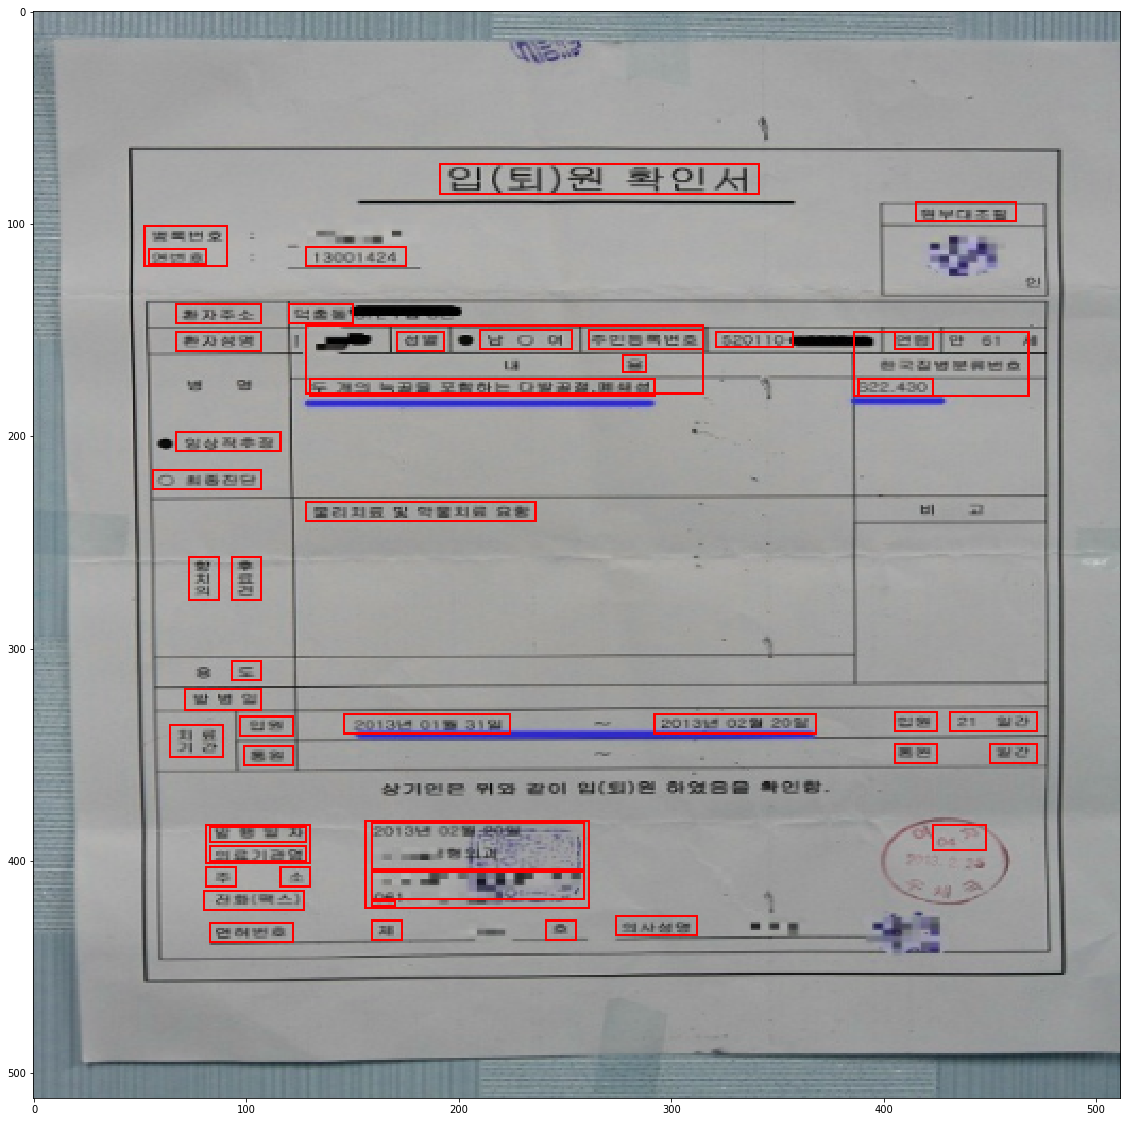

In [338]:
import pandas as pd
from scipy.spatial.distance import cdist
h , w = img_gt.shape[0] , img_gt.shape[1]
#slice_ = pd.DataFrame(point2).drop_duplicates(keep= "first").index.tolist()
pointt = np.array(point2)
pointt[:,0] = pointt[:,0]/w
pointt[:,1] = pointt[:,1]/h
total = pd.DataFrame(pointt)
metric = "euclidean"
dist_ex1 = cdist( total , total, metric=metric )
slice_ = pd.DataFrame(dist_ex1 < 0.01).drop_duplicates().index.tolist()
box2 = np.array(point)[slice_, :]
print(len(point2))
print(len(box2))
#point = np.array(point3)[slice_]
for box in box2 :
    im = cv2.drawContours(i,[box],0,(255,0,0),1)
    
cv2.imwrite("clovar_test.jpg", im)
f , ax = plt.subplots(figsize=(20,20))
plt.imshow(im)
plt.show()


In [254]:
np.array(point)[[0,1,5],:]

array([[[ 951, 1002],
        [ 951,  991],
        [ 964,  991],
        [ 964, 1002]],

       [[ 956,  999],
        [ 956,  994],
        [ 959,  994],
        [ 959,  999]],

       [[ 103,  998],
        [ 103,  995],
        [ 107,  995],
        [ 107,  998]]])

In [198]:
point = []
for c in cnts : 
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    print(point)
    point.append(",".join(list(map(lambda x : str(x),box.flatten().tolist())))+",###")
    
    im = cv2.drawContours(i,[box],0,(255,0,0),2)
    continue

error: OpenCV(4.1.0) /io/opencv/modules/imgproc/src/convhull.cpp:137: error: (-215:Assertion failed) total >= 0 && (depth == CV_32F || depth == CV_32S) in function 'convexHull'
